# Stroke prediction
A stroke, sometimes called a “brain attack,” occurs when the blood supply to part of the brain is interrupted or reduced
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.In this project we will predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status

<img src ="dataset-card.jpg" style="width:400px;height:350px"/>

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(12,6)
sns.set(rc={'figure.figsize':(12,6)})

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
total_stroke=df[df['stroke']==1]
print('The total number of people gets stroke is:',len(total_stroke))

The total number of people gets stroke is: 249


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The ['bmi'] column consist of some NULL Values

In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### Filling the NULL Values 

In [10]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Now the data is free from NULL values

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Dropping the id column

In [13]:
df=df.drop('id',axis=1)

In [14]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


### Exploring the gender column

In [15]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [16]:
df=df[df['gender']!='Other']

In [17]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [18]:
df.shape

(5109, 11)

<Axes: xlabel='stroke', ylabel='count'>

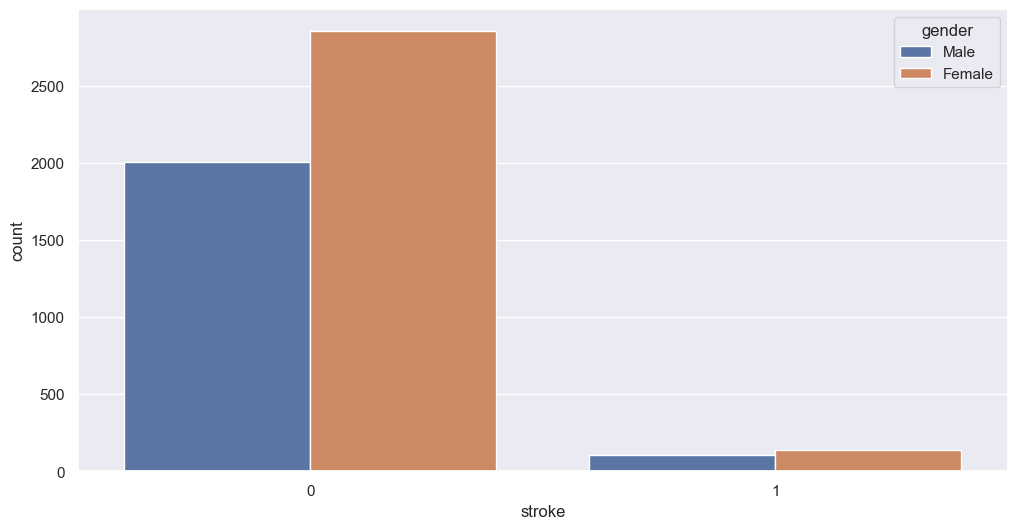

In [19]:
sns.countplot(x='stroke',data=df,hue='gender')

we can see that females are more likely to get stroke as compared to male 

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Number of people having stroke according to the Residence type

In [21]:
rural_stroke_count=df[(df['stroke']==1) & (df['Residence_type']=='Rural')]
print("The number of Rural people getting stroke is:",len(rural_stroke_count))

The number of Rural people getting stroke is: 114


In [22]:
urban_stroke_count=df[(df['stroke']==1) & (df['Residence_type']=='Urban')]
print("The number of urban people getting stroke is:",len(urban_stroke_count))

The number of urban people getting stroke is: 135


### Exploring the age column

Overall Age distribution

<Axes: xlabel='age', ylabel='Count'>

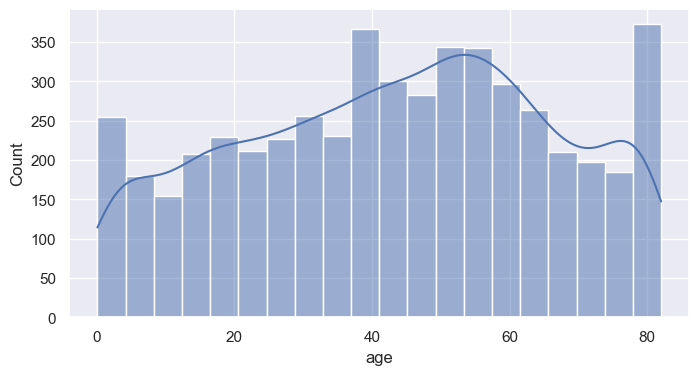

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],kde=True)

Age distribution of people with stroke

In [24]:
p=df[df['stroke']==1]

Text(0.5, 1.0, 'Age distribution of people with stroke')

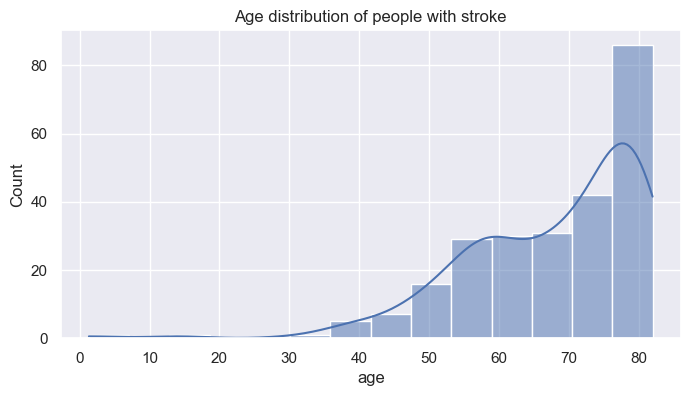

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(x='age',data=p,kde=True)
plt.title('Age distribution of people with stroke')

The old age people are getting more stroke

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Exploring the work_type column

In [27]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [28]:
q=df.groupby('work_type')['stroke'].sum()
q

work_type
Govt_job          33
Never_worked       0
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Count of work_type having stroke')

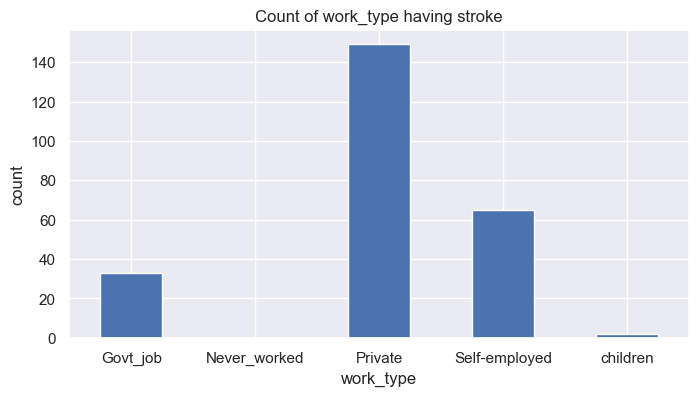

In [29]:
plt.figure(figsize=(8,4))
q.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('Count of work_type having stroke')

Maximum people having stroke is from private domain followed by self-employed and Govt_job

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Exploring the smoking_status column

In [31]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [32]:
r=df[(df['smoking_status']!='Unknown') & (df['stroke']==1)]
print(len(r))
r.head()

202


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<Axes: xlabel='stroke', ylabel='count'>

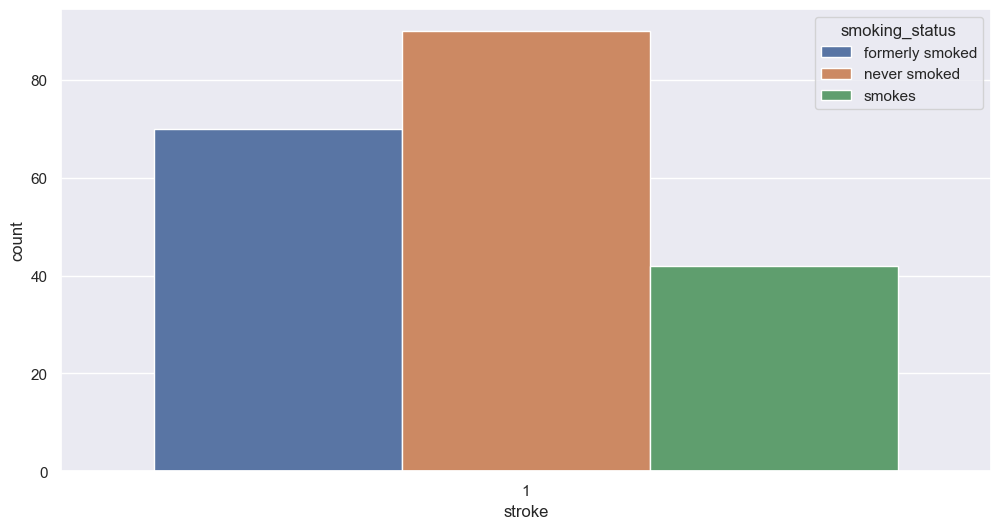

In [33]:
sns.countplot(x='stroke',hue='smoking_status',data=r)

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Text(0.5, 1.0, 'Box Plot')

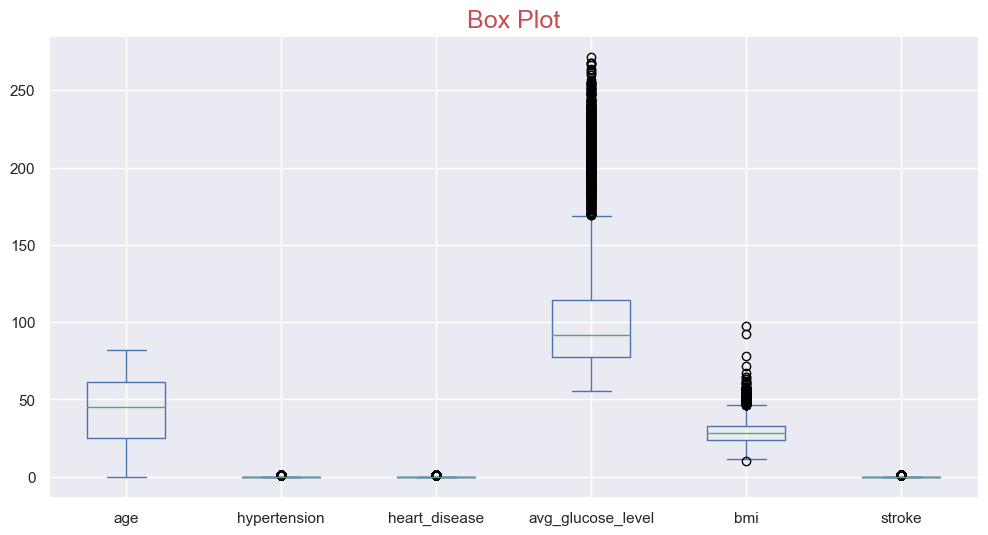

In [35]:
df.plot(kind='box')
plt.title('Box Plot',size=18,color='r')

From the above graph it looks like that the avg_glucose_level consist of outliers but in reality it is not,beacuse it may happen that a person is suffering from high glucoe level and hence getting stroke

In [36]:
df['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## Introducing Machine Learning

In [37]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [39]:
df['gender']=labelencoder.fit_transform(df['gender'])

In [40]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [41]:
df['Residence_type']=labelencoder.fit_transform(df['Residence_type'])

In [42]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,0,202.21,28.893237,never smoked,1


In [43]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [44]:
df['smoking_status']=labelencoder.fit_transform(df['smoking_status'])

In [45]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,1,228.69,36.600000,1,1
1,0,61.0,0,0,Yes,Self-employed,0,202.21,28.893237,2,1


## Dropping unnecessary columns

In [46]:
df.drop(['ever_married','work_type','bmi'],axis=1,inplace=True)

In [47]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,228.69,1,1
1,0,61.0,0,0,0,202.21,2,1
2,1,80.0,0,1,0,105.92,2,1
3,0,49.0,0,0,1,171.23,3,1
4,0,79.0,1,0,0,174.12,2,1


# Splitting the data for train and test

In [48]:
x=df.drop('stroke',axis=1)
x.head(2)

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,228.69,1
1,0,61.0,0,0,0,202.21,2


In [49]:
y=df['stroke']
y.head(2)

0    1
1    1
Name: stroke, dtype: int64

### Train Test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

### Training

In [76]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy

In [77]:
ac_lr=model.score(x_test,y_test)
ac_lr

0.949119373776908

### prediction

In [78]:
model.predict([[0,49.0,0,0,1,171.23,3]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [61]:
gender=int(input('Enter the gender:'))
age=float(input('Enter the age:'))
hypertension=int(input('Enter the hypertension:'))
heart_disease=int(input('Enter the heart disease:'))
Residence_type=int(input('Enter the Residence type:'))
avg_glucose_level=float(input('Enter the average glucose level:'))
smoking_status=int(input('Enter the average smoking status:'))

arr=[[gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status]]

result=model.predict(arr)

if result[0]==1:
    print('\33[1m' 'The person gets stroke')
else:
    print('\33[1m' 'The person did not gets stroke')

Enter the gender:0
Enter the age:49.0
Enter the hypertension:0
Enter the heart disease:0
Enter the Residence type:1
Enter the average glucose level:171.23
Enter the average smoking status:3
The person did not gets stroke


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
ac_knn=knn.score(x_test,y_test)
ac_knn

0.9432485322896281

In [82]:
knn.predict([[0,49.0,0,0,1,171.23,3]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# SVM

In [83]:
from sklearn.svm import SVC
svm=SVC()

In [84]:
svm.fit(x_train,y_train)

SVC()

In [85]:
ac_svm=svm.score(x_test,y_test)
ac_svm

0.949119373776908

In [86]:
svm.predict([[0,49.0,0,0,1,171.23,3]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Text(0, 0.5, 'Accuracy score')

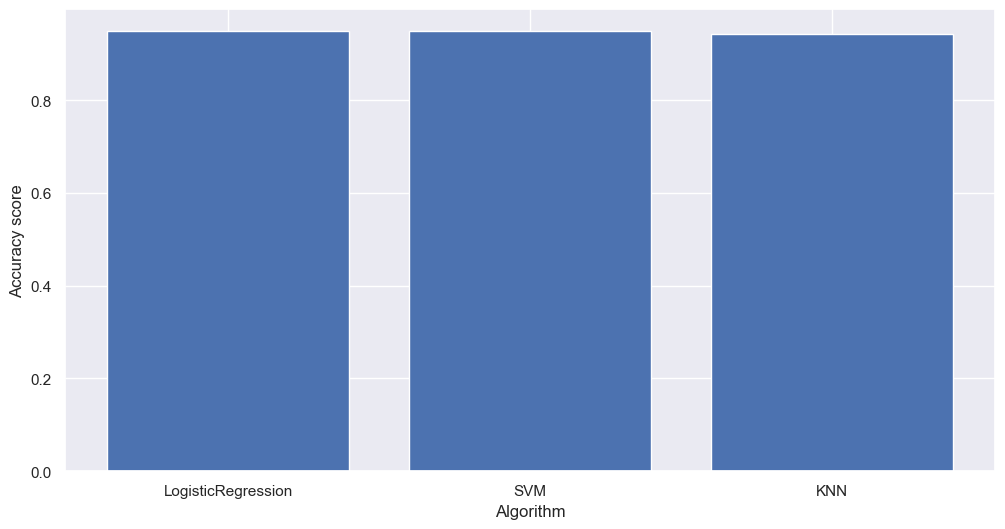

In [89]:
plt.bar(['LogisticRegression','SVM','KNN'],[ac_lr,ac_svm,ac_knn])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy score')

# K Fold Cross Validation

LogisticRegression

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=5)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95200784])

SVM

In [73]:
cross_val_score(SVC(gamma='auto'),x,y,cv=5)

array([0.95009785, 0.95107632, 0.95107632, 0.95107632, 0.9510284 ])

KNN

In [74]:
cross_val_score(KNeighborsClassifier(),x,y,cv=5)

array([0.94031311, 0.94618395, 0.94227006, 0.94911937, 0.94417238])

### Hence  support vector machine(SVM) & LogisticRegression are giving  the best accuracy score

In [270]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,228.69,1,1
1,0,61.0,0,0,0,202.21,2,1
2,1,80.0,0,1,0,105.92,2,1
3,0,49.0,0,0,1,171.23,3,1
4,0,79.0,1,0,0,174.12,2,1


# THE END